In [1]:
import pandas as pd
import numpy as np

## Pandas Illustrated: La guía visual definitiva sobre los pandas

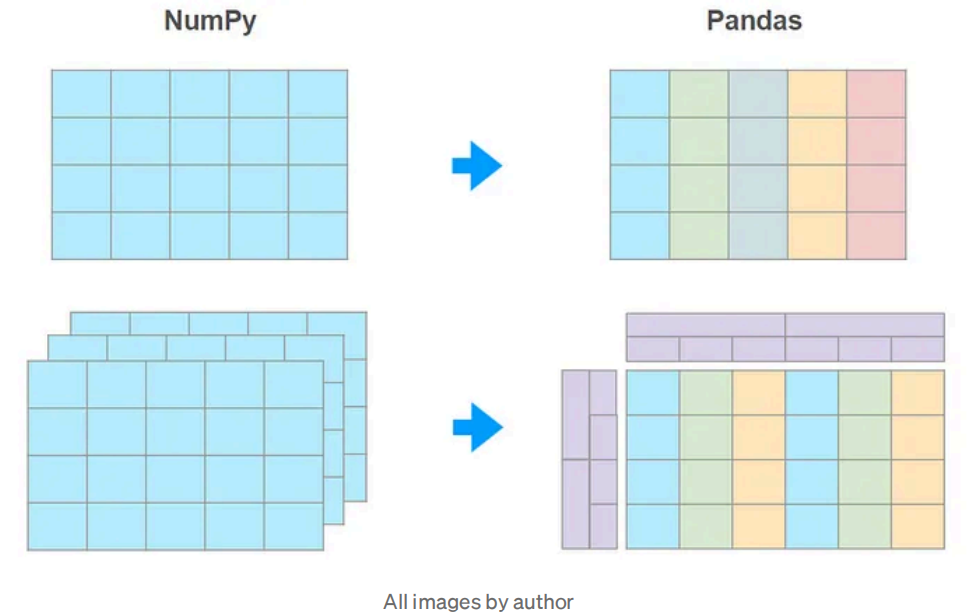

Pandas es un estándar de la industria para analizar datos en Python. Con unas pocas pulsaciones de teclas, puede cargar, filtrar, reestructurar y visualizar gigabytes de información heterogénea. Desarrollado sobre la biblioteca NumPy, toma prestados muchos de sus conceptos y convenciones de sintaxis, por lo que si se siente cómodo con NumPy, Pandas le resultará una herramienta bastante familiar. E incluso si nunca ha oído hablar de NumPy, Pandas ofrece una

Gran oportunidad para resolver problemas de análisis de datos con poca o ninguna experiencia en programación.
Hay muchas guías de Pandas. En esta en particular, se espera que tengas un conocimiento básico de NumPy. Si no lo tienes, te sugiero que leas la guía ilustrada de NumPy para tener una idea de qué es una matriz de NumPy, en qué aspectos es superior a una lista de Python y cómo ayuda a evitar bucles en operaciones elementales.
Dos características clave que Pandas aporta a las matrices de NumPy son:

1. Tipos heterogéneos: cada columna puede tener su propio tipo;
2. Índice: mejora la velocidad de búsqueda de las columnas especificadas.

Resulta que estas características son suficientes para hacer de Pandas un competidor poderoso tanto para las hojas de cálculo como para las bases de datos.
Polars, la reciente reencarnación de Pandas (escrita en Rust, por lo tanto más rápida¹) ya no usa NumPy en segundo plano, pero la sintaxis es bastante similar, por lo que aprender Pandas también te permitirá sentirte cómodo con Polars.

El artículo consta de cuatro partes:

Parte 1. Motivación
Parte 2. Series e índices
Parte 3. DataFrames
Parte 4. MultiIndex

… y es bastante extenso, aunque fácil de leer ya que se compone principalmente de imágenes.
Para una lectura de 1 minuto de los “primeros pasos” en Pandas, puedo recomendar una excelente Introducción visual a Pandas² de Jay Alammar.



## Parte 1. Motivación y presentación
Supongamos que tiene un archivo con un millón de líneas de valores separados por comas como este:

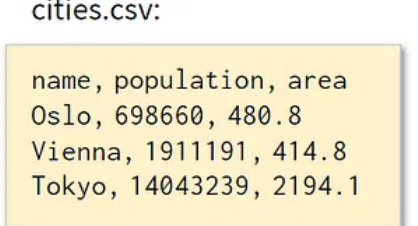

Y necesitas dar respuestas a preguntas básicas como "¿Qué ciudades tienen un área de más de 450 km² y una población de menos de 10 millones" con NumPy.
La solución de fuerza bruta de introducir toda la tabla en una matriz NumPy no es una buena opción: normalmente, las matrices NumPy son homogéneas (=todos los valores tienen el mismo tipo), por lo que todos los campos se interpretarán como cadenas y las comparaciones no funcionarán como se espera.
Sí, NumPy tiene matrices estructuradas y de registro que permiten columnas de diferentes tipos, pero están pensadas principalmente para interactuar con código C. Cuando se utilizan para fines generales, tienen las siguientes desventajas:

- No son realmente intuitivas (por ejemplo, te encontrarás con constantes como <f8 y <U8
en todas partes);

- Tienen algunos problemas de rendimiento en comparación con las matrices NumPy normales;

- Almacenados de forma contigua en la memoria, por lo que cada adición o eliminación de columna requiere reasignar toda la matriz;
- Aún faltan muchas funciones de Pandas DataFrames.

Su próximo intento probablemente sería almacenar cada columna como un vector NumPy separado.
Y después de eso, tal vez envolverlos en un diccionario para que sea más fácil restaurar la integridad de la 'base de datos' si decide agregar o eliminar una fila o dos más tarde. Así es cómo se vería:

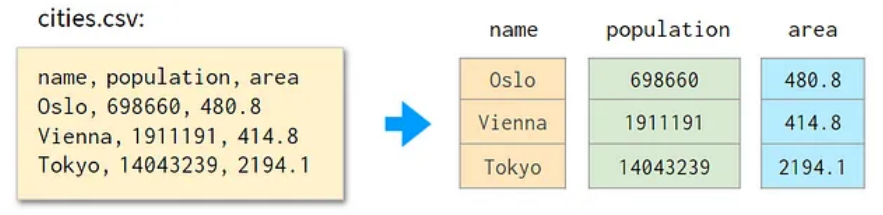



A continuación, se muestran algunos ejemplos de lo que Pandas puede hacer por usted y que NumPy no puede hacer (o requiere un esfuerzo significativo para lograrlo).

## Pandas Showcase
Considere la siguiente tabla:

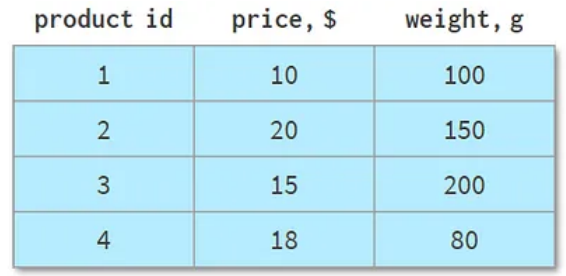

Describe la variada línea de productos de una tienda online con un total de cuatro productos distintos. A diferencia del ejemplo anterior, se puede representar con una matriz NumPy o con un DataFrame de Pandas igualmente bien. Pero veamos algunas operaciones comunes con él.

## 1. Clasificación

La ordenación por columna es más legible con Pandas, como puedes ver a continuación:

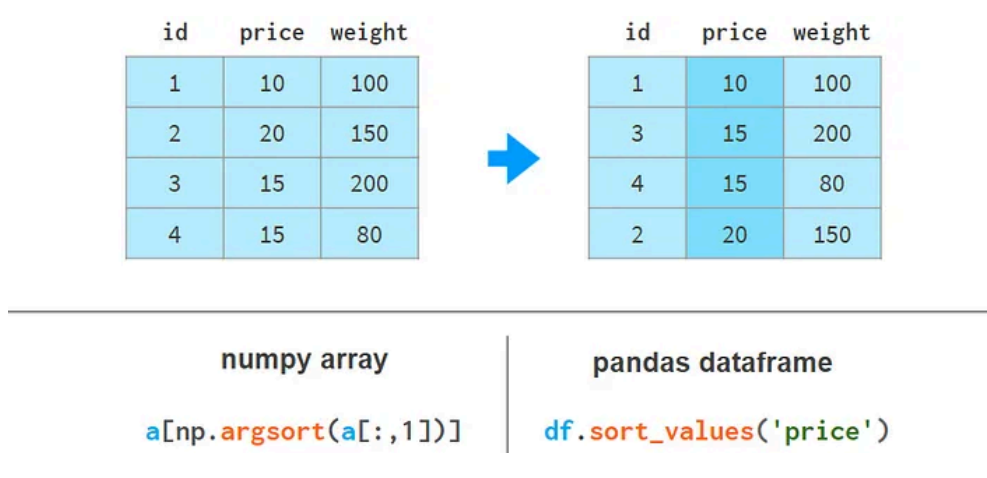

Aquí argsort(a[:,1]) calcula la permutación que hace que la segunda columna de a se ordene en orden ascendente y luego la columna externa a[…] reordena las filas de a ,en consecuencia. Pandas puede hacerlo en un solo paso.

## 2. Ordenar por varias columnas
Si necesitamos ordenar por columna de precio desempatando con la columna de peso, la situación empeora para NumPy:

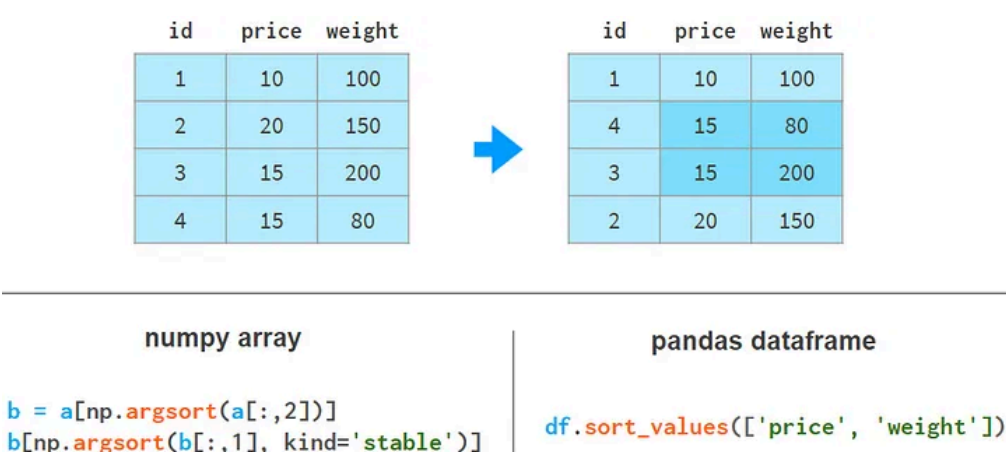

Con NumPy, primero ordenamos por peso y luego aplicamos un segundo ordenamiento por precio. Un algoritmo de ordenamiento estable garantiza que el resultado del primer ordenamiento no se pierda durante el segundo. Hay otras formas de hacerlo con NumPy, pero ninguna es tan simple y elegante como con Pandas.

## 3. Agregar una columna
Agregar columnas es mucho mejor con Pandas, tanto desde el punto de vista sintáctico como arquitectónico:
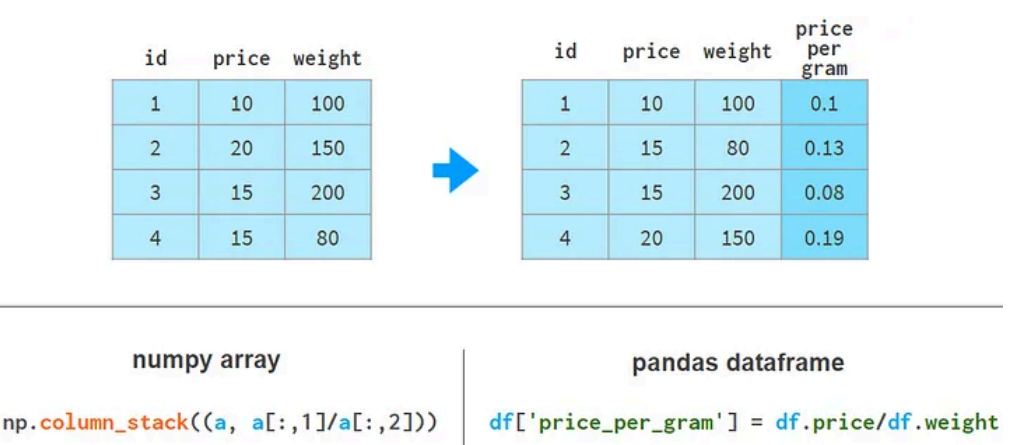

Pandas no necesita reasignar memoria para toda la matriz como NumPy; simplemente agrega una referencia a una nueva columna y actualiza un “registro” de los nombres de las columnas.